In [2]:
from train_lg_gbc_model import train_last_layer,evaluate_model

/Users/Yichen/anaconda2/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img_width=299
img_height = 299
train_data_dir = "data/train"
test_data_dir="data/test"
num_image=1440
epochs = 10
    

In [4]:
my_model, model=train_last_layer(img_width, img_height,
                            train_data_dir,
                            num_image,epochs)

Found 1440 images belonging to 4 classes.
96/96 [==============================] - 635s 7s/step
(1440, 2048) (1440, 4)
Epoch 1/18
1440/1440 [==============================] - 3s 2ms/step - loss: 0.7388 - acc: 0.7069
Epoch 2/18
1440/1440 [==============================] - 1s 824us/step - loss: 0.3802 - acc: 0.8549
Epoch 3/18
1440/1440 [==============================] - 1s 823us/step - loss: 0.2691 - acc: 0.9146
Epoch 4/18
1440/1440 [==============================] - 1s 828us/step - loss: 0.2018 - acc: 0.9493
Epoch 5/18
1440/1440 [==============================] - 1s 822us/step - loss: 0.1623 - acc: 0.9681
Epoch 6/18
1440/1440 [==============================] - 1s 826us/step - loss: 0.1379 - acc: 0.9729
Epoch 7/18
1440/1440 [==============================] - 1s 833us/step - loss: 0.1120 - acc: 0.9799
Epoch 8/18
1440/1440 [==============================] - 1s 812us/step - loss: 0.0980 - acc: 0.9868
Epoch 9/18
1440/1440 [==============================] - 1s 835us/step - loss: 0.0861 - acc:

In [5]:
y_test,y_pred,y_images=evaluate_model(test_data_dir,my_model,model)

Found 360 images belonging to 4 classes.
24/24 [==============================] - 154s 6s/step
Accuracy score: 0.8222222222222222
Log_loss score: 0.4934759032564437


In [6]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 3, 3, 2, 0, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3,

In [29]:
confusion_matrix(y_test,y_pred.argmax(axis=1))

array([[79,  6,  3,  2],
       [ 4, 76,  0, 10],
       [ 3,  2, 74, 11],
       [ 1,  6,  5, 78]])

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
class_names=['Bohemian','Coastal','Industrial','Scandinavian']

Confusion matrix, without normalization
[[78  4  4  4]
 [ 7 69  2 12]
 [ 4  1 72 13]
 [ 0  6  7 77]]


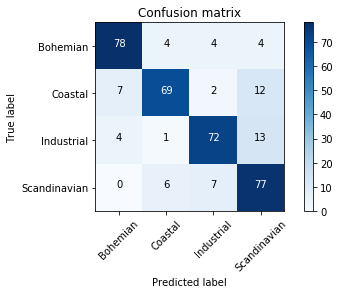

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.savefig("confusion.png",bbox_inches="tight")

plt.show()


Normalized confusion matrix
[[0.87 0.04 0.04 0.04]
 [0.08 0.77 0.02 0.13]
 [0.04 0.01 0.8  0.14]
 [0.   0.07 0.08 0.86]]


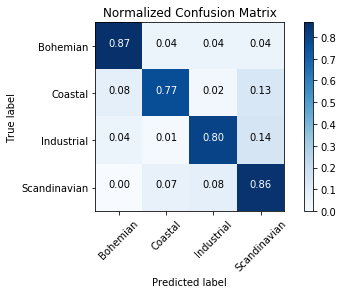

In [11]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.savefig("Normalized_confusion.png",bbox_inches="tight")
plt.show()

In [133]:
y_pred1=y_pred.argmax(axis=1)

In [46]:
import numpy as np

In [82]:
result=np.vstack((y_test,y_pred1))

In [83]:
result

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [97]:
result=np.transpose(result)

In [98]:
result

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 3],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [59]:
accuracy=result[:,0]==result[:,1]

# True Coastal predict Scandinavian

In [109]:
y_images[(result[:,0]==1) * (result[:,1]==3)]

array(['Coastal/6f4552c37b785f96dd4e25afc3fdbcc3.jpg',
       'Coastal/dc531272d4e11df2839d8a1f205f24be.jpg',
       'Coastal/image_coastal_design_living_room_7.png',
       'Coastal/image_coastal_design_living_room_97.png',
       'Coastal/image_coastal_style_bedroom_14.png',
       'Coastal/image_coastal_style_kitchen_2.png',
       'Coastal/image_coastal_style_kitchen_80.png',
       'Coastal/image_coastal_style_living_room_61.png',
       'Coastal/image_interior_design_coastal_28.png',
       'Coastal/image_interior_design_coastal_79.png'], dtype='<U65')

In [131]:
#True Industrial predict Scandinavian
y_images[(result[:,0]==2) * (result[:,1]==3)]

array(['Industrial/image_industrial_design_living_room_29.png',
       'Industrial/image_industrial_design_living_room_46.png',
       'Industrial/image_industrial_design_living_room_66.png',
       'Industrial/image_industrial_design_living_room_69.png',
       'Industrial/image_industrial_style_bedroom_52.png',
       'Industrial/image_industrial_style_bedroom_88.png',
       'Industrial/image_interior_design_industrial_look_51.png',
       'Industrial/image_interior_design_industrial_look_65.png',
       'Industrial/image_interior_design_industrial_look_90.png',
       'Industrial/image_interior_design_industrial_style_7.png',
       'Industrial/image_interior_design_industrial_style_80.png'],
      dtype='<U65')

In [108]:
y_images=np.array(y_images)

In [110]:
import cv2

In [129]:
image = cv2.imread('data/test/Coastal/image_coastal_design_living_room_33.png', -1)

In [120]:
image = cv2.resize(image, (299, 299))
#image = np.expand_dims(image/255, axis=0)
#image = np.vstack([image])